In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [4]:
train.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


Text(0.5, 1.0, 'Distribution of the Target Variable')

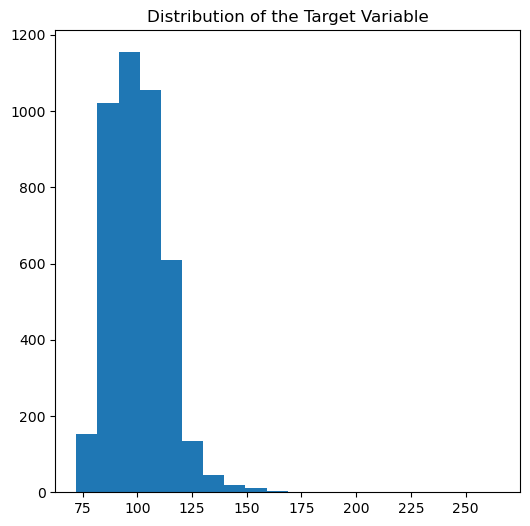

In [6]:
plt.figure(figsize=(6, 6))
plt.hist(train.y.values, bins=20)
plt.title('Distribution of the Target Variable')

<Axes: >

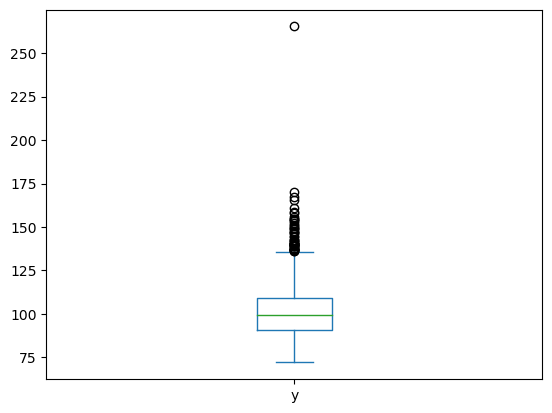

In [7]:
train['y'].plot.box()

In [8]:
train.y.describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

In [9]:
Q1 = train['y'].quantile(0.25)
Q3 = train['y'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(lower)
print(upper)

63.534999999999975
136.29500000000002


In [10]:
outlier_index = train[(train.y > upper)].index
outlier_index

Index([  43,  203,  216,  253,  342,  420,  429,  681,  846,  883,  889,  900,
        995,  998, 1033, 1036, 1060, 1141, 1203, 1205, 1269, 1279, 1349, 1459,
       1730, 2240, 2263, 2348, 2357, 2376, 2414, 2470, 2496, 2735, 2736, 2852,
       2887, 2888, 2905, 2983, 3028, 3090, 3133, 3177, 3215, 3442, 3744, 3773,
       3980, 4176],
      dtype='int64')

In [11]:
train = train.drop(outlier_index)

Text(0.5, 1.0, 'Distribution of the Target Variable, without outlier index')

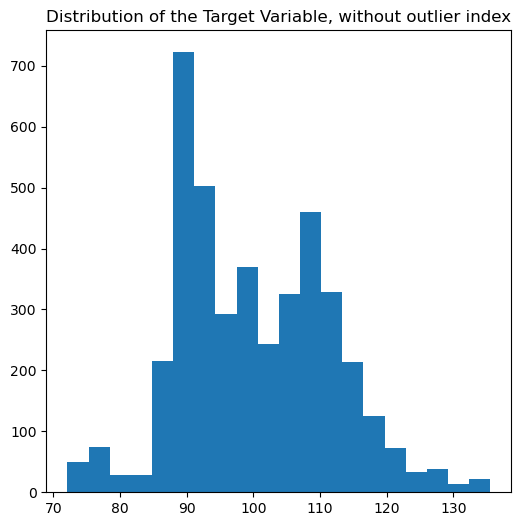

In [12]:
plt.figure(figsize=(6, 6))
plt.hist(train.y.values, bins=20)
plt.title('Distribution of the Target Variable, without outlier index')

<Axes: >

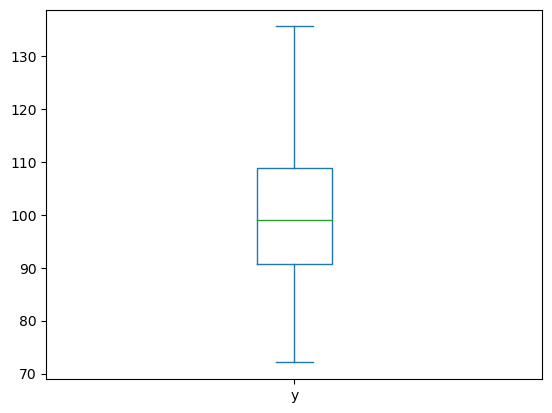

In [13]:
train['y'].plot.box()

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4159 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.0+ MB


In [15]:
y = train['y']
X = train.drop(['y','ID'], axis = 1)

X_test = test.drop(['ID'], axis = 1)

In [16]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
categorical_features = X.select_dtypes(exclude = 'number').columns.values
categorical_features

array(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype=object)

In [18]:
oe = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value= np.NaN)
oe.fit(X_train[categorical_features])

OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=nan)

In [19]:
X_train[categorical_features] = oe.transform(X_train[categorical_features])
X_val[categorical_features] = oe.transform(X_val[categorical_features])
X_test[categorical_features] = oe.transform(X_test[categorical_features])

In [20]:
impute = SimpleImputer(strategy = 'median')
impute.fit(X_train)

SimpleImputer(strategy='median')

In [21]:
X_train = impute.transform(X_train)
X_val = impute.transform(X_val)
X_test = impute.transform(X_test)

In [22]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [23]:
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [24]:
sel = SelectKBest(mutual_info_regression, k = 30)
sel.fit(X_train, y_train)

SelectKBest(k=30,
            score_func=<function mutual_info_regression at 0x0000021ACB6D6A70>)

In [25]:
X_train = sel.transform(X_train)
X_val = sel.transform(X_val)
X_test = sel.transform(X_test)

In [26]:
lr = LinearRegression()

In [27]:
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
y_train_pred = lr.predict(X_train)
y_val_pred = lr.predict(X_val)

y_test_pred = lr.predict(X_test)

In [29]:
print(r2_score(y_train, y_train_pred))
print(r2_score(y_val, y_val_pred))

0.6286849924753969
0.6302262354298616


In [30]:
submission = pd.DataFrame({
    'ID' : test['ID'],
    'y' : y_test_pred
})

submission.head()

,ID,y
0,1,78.553127
1,2,94.596722
2,3,73.850002
3,4,78.553127
4,5,110.160413


In [31]:
submission.to_csv('Submission_LR_F30.csv', index = False)